In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 

In [2]:
data=pd.read_csv("iio_us-east-1_i-a2eb1cd9_NetworkIn.csv")

In [3]:
data

,timestamp,value
0,2013-10-09 16:25:00,9926554.0
1,2013-10-09 16:30:00,50745578.0
2,2013-10-09 16:35:00,61519397.0
3,2013-10-09 16:40:00,55996401.0
4,2013-10-09 16:45:00,40876988.0
...,...,...
1238,2013-10-13 23:35:00,7198625.2
1239,2013-10-13 23:40:00,7964260.4
1240,2013-10-13 23:45:00,7547664.0
1241,2013-10-13 23:50:00,7988676.2


In [4]:
data.head()#first five rows

,timestamp,value
0,2013-10-09 16:25:00,9926554.0
1,2013-10-09 16:30:00,50745578.0
2,2013-10-09 16:35:00,61519397.0
3,2013-10-09 16:40:00,55996401.0
4,2013-10-09 16:45:00,40876988.0


In [5]:
data.tail() #last five rows

,timestamp,value
1238,2013-10-13 23:35:00,7198625.2
1239,2013-10-13 23:40:00,7964260.4
1240,2013-10-13 23:45:00,7547664.0
1241,2013-10-13 23:50:00,7988676.2
1242,2013-10-13 23:55:00,7788122.6


In [6]:
data.sample(5) #random data used

,timestamp,value
409,2013-10-11 02:30:00,2234826.6
36,2013-10-09 19:25:00,12193640.4
442,2013-10-11 05:15:00,2105559.2
999,2013-10-13 03:40:00,4501812.4
491,2013-10-11 09:20:00,1716114.6


In [7]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1243 non-null   object 
 1   value      1243 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.6+ KB


In [8]:
data.describe()
#here we get min ,max ,mean value

,value
count,1.243000e+03
mean,4.615222e+06
std,4.534242e+06
min,7.897810e+05
25%,2.576004e+06
50%,3.795176e+06
75%,5.152489e+06
max,6.151940e+07


In [17]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

# Basic checks

In [20]:
data.head()#first five rows

,timestamp,value
0,2013-10-09 16:25:00,9926554.0
1,2013-10-09 16:30:00,50745578.0
2,2013-10-09 16:35:00,61519397.0
3,2013-10-09 16:40:00,55996401.0
4,2013-10-09 16:45:00,40876988.0


In [22]:
data=pd.read_csv('iio_us-east-1_i-a2eb1cd9_NetworkIn.csv',parse_dates=[0],index_col='timestamp')

In [24]:
# EDA

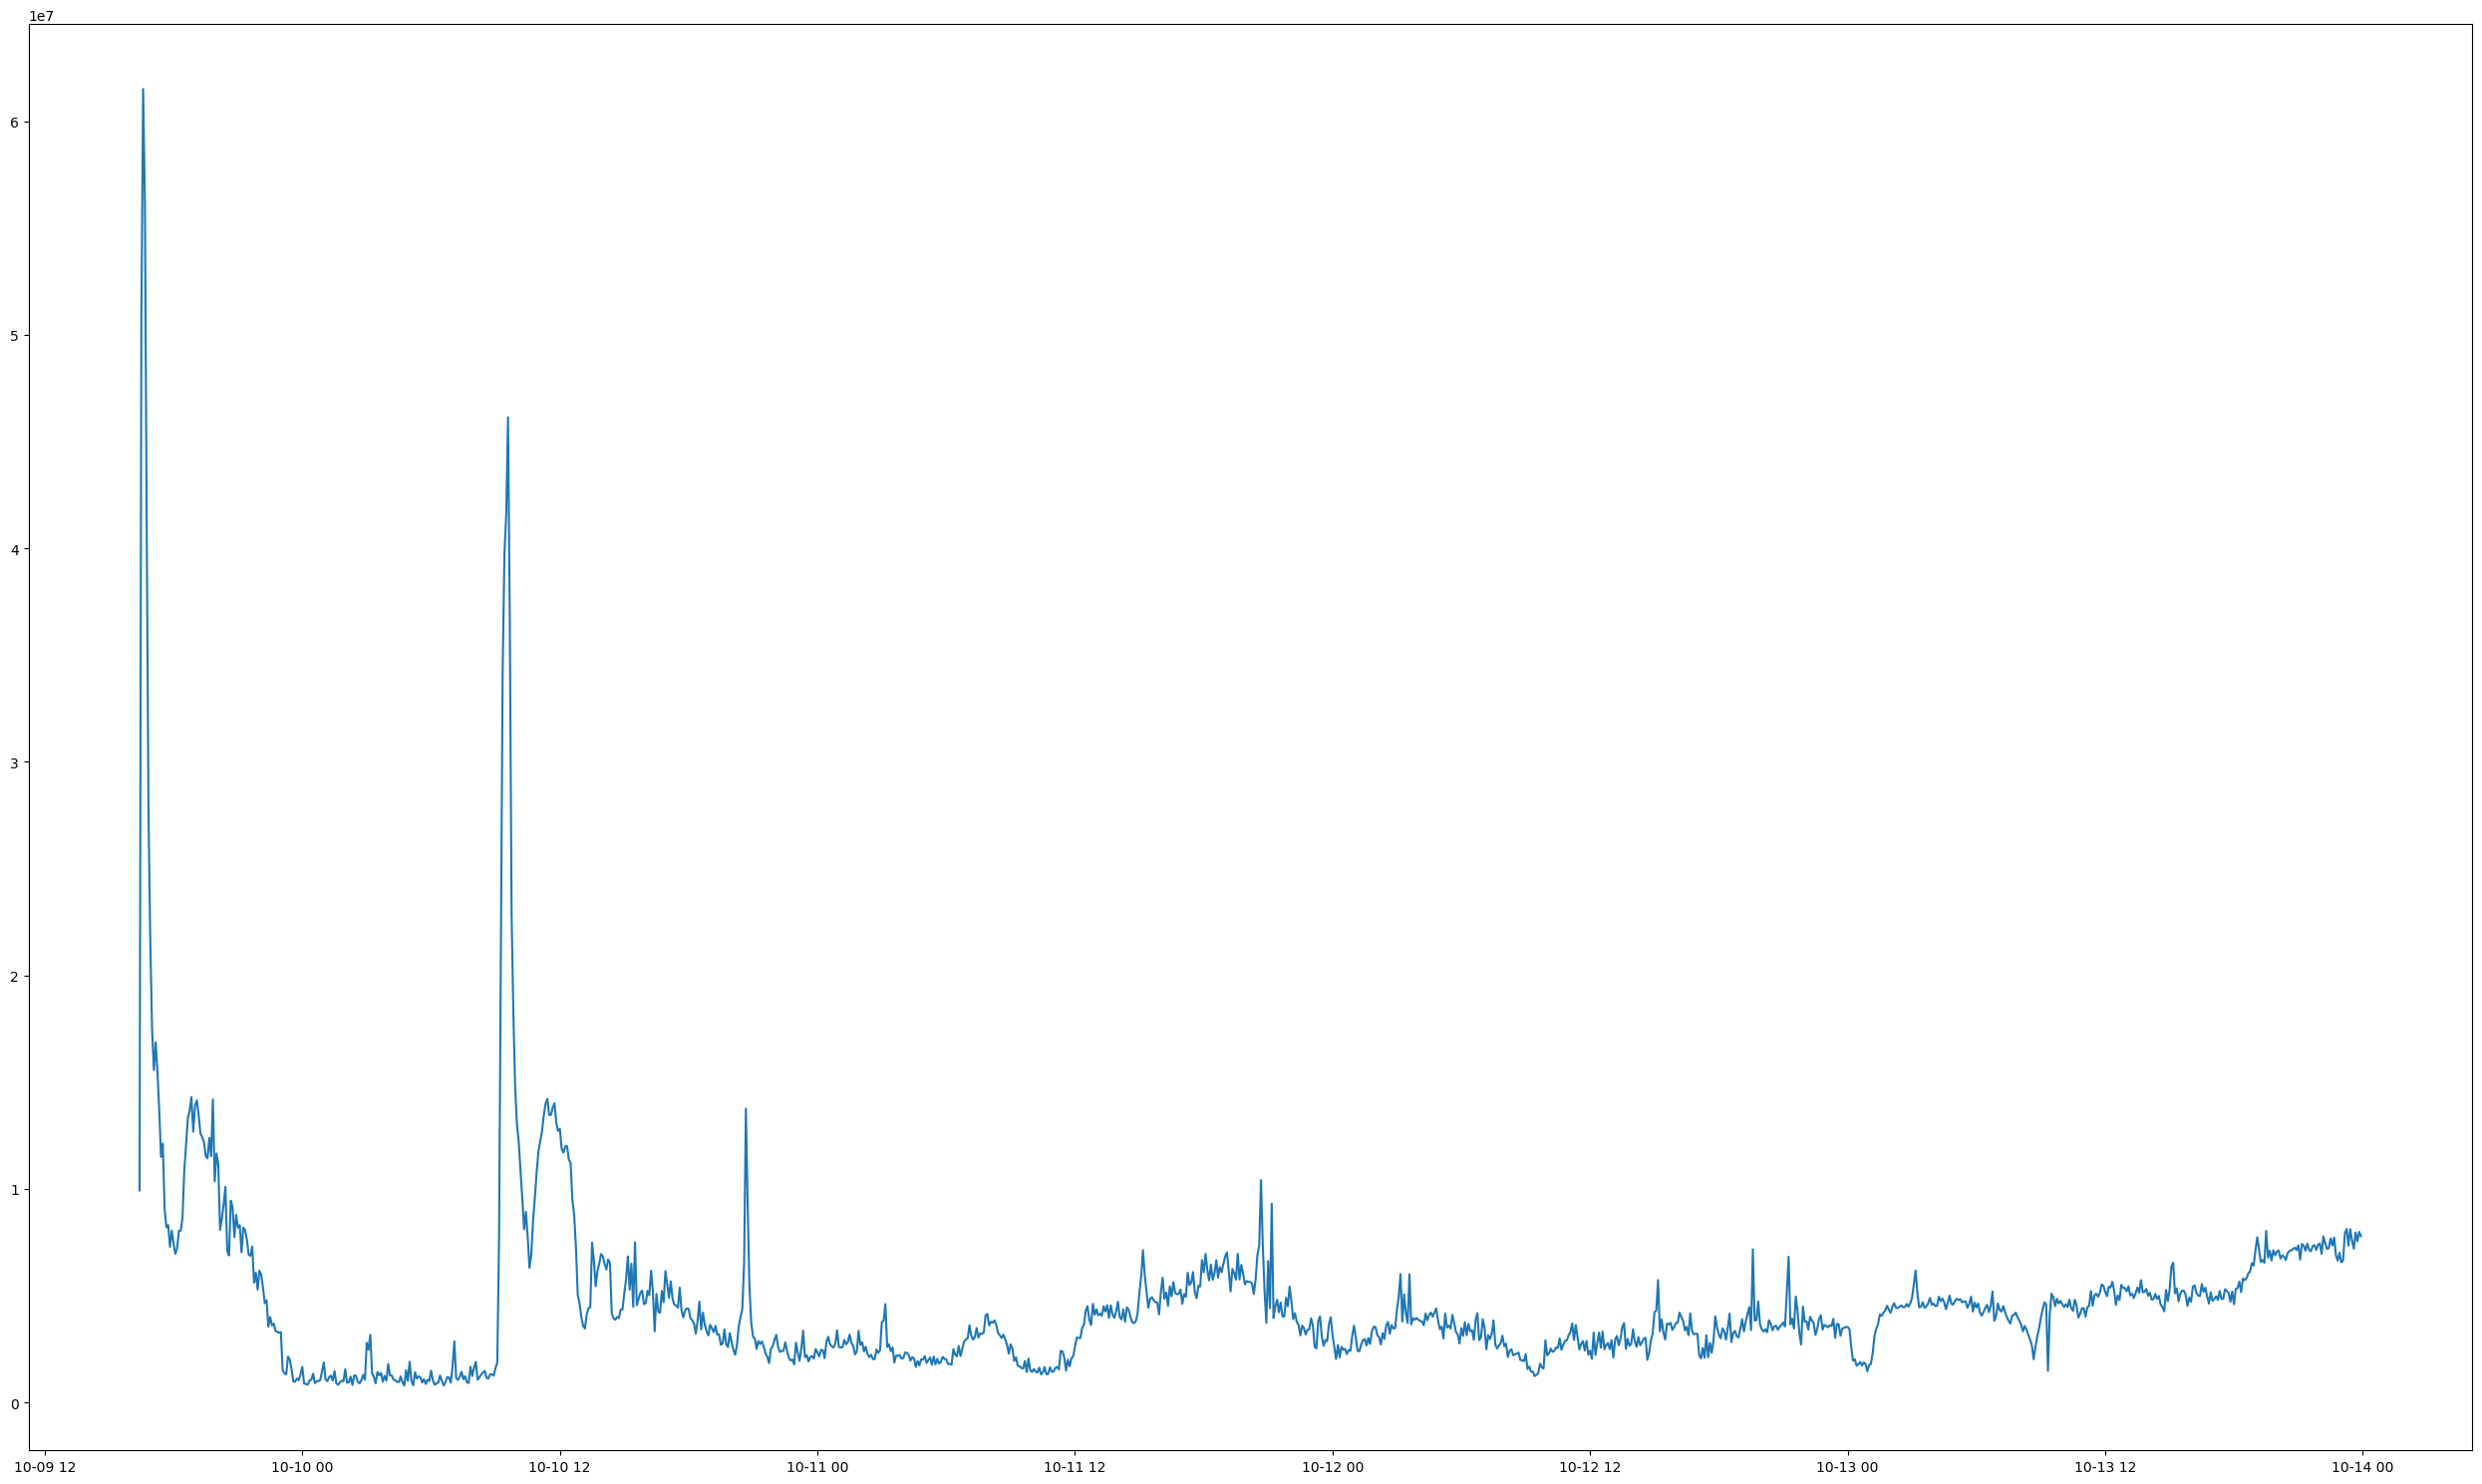

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

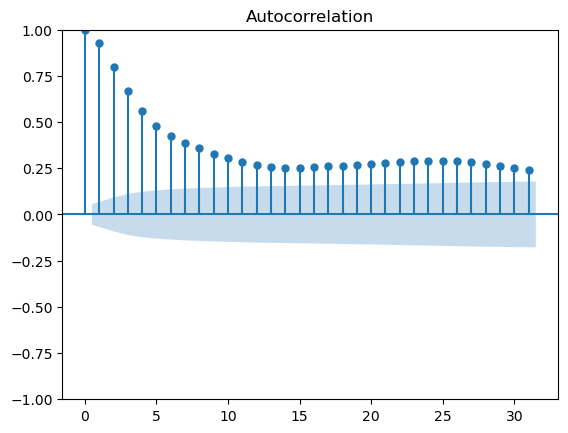

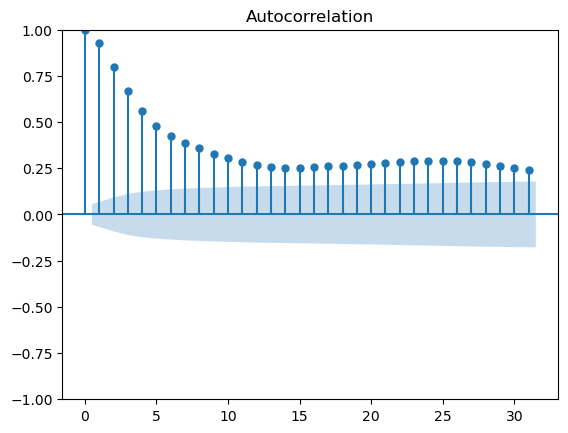

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [29]:
#From the autocorrelation plot, it is clear that given series is not stationary.

In [30]:
#We can perform the ADfuller test, a test based on hypothesis, where if the p-value is
#less than 0.05, then we can consider the time series is stationary, and if the P-value is
#greater than 0.05, then the time series is non-stationary.

In [34]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -5.90238880728728
2. P-Value :  2.7585110884823967e-07
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1229
5. Critical Values :
	 1% :  -3.4356819860439574
	 5% :  -2.863894574114006
	 10% :  -2.568023609111511


In [36]:
#P-value is higher for our dataset, and we can say that the evidence of rejecting the null
#hypothesis is low; hence the time series is non-stationary.

In [38]:
data

,value
timestamp,
2013-10-09 16:25:00,9926554.0
2013-10-09 16:30:00,50745578.0
2013-10-09 16:35:00,61519397.0
2013-10-09 16:40:00,55996401.0
2013-10-09 16:45:00,40876988.0
...,...
2013-10-13 23:35:00,7198625.2
2013-10-13 23:40:00,7964260.4
2013-10-13 23:45:00,7547664.0


In [40]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [42]:
data1 # Series integrated to the order of 1

,value
timestamp,
2013-10-09 16:25:00,NaN
2013-10-09 16:30:00,40819024.0
2013-10-09 16:35:00,10773819.0
2013-10-09 16:40:00,-5522996.0
2013-10-09 16:45:00,-15119413.0
...,...
2013-10-13 23:35:00,-377033.2
2013-10-13 23:40:00,765635.2
2013-10-13 23:45:00,-416596.4


In [44]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2013-10-09 16:30:00,40819024.0
2013-10-09 16:35:00,10773819.0
2013-10-09 16:40:00,-5522996.0
2013-10-09 16:45:00,-15119413.0
2013-10-09 16:50:00,-13298049.0
...,...
2013-10-13 23:35:00,-377033.2
2013-10-13 23:40:00,765635.2
2013-10-13 23:45:00,-416596.4


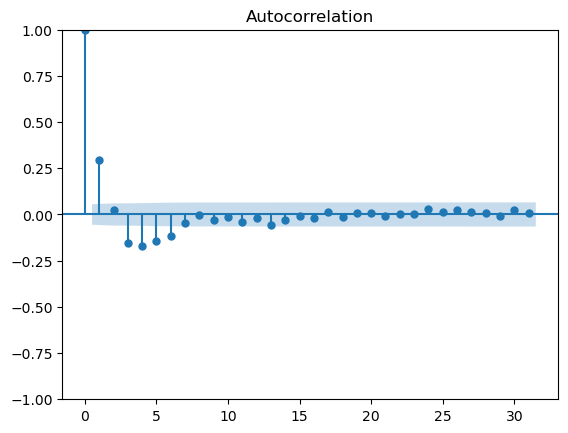

In [46]:
plot_acf(data1); # autocorrelation plot 

In [48]:
data2=data1.diff(periods=1) # differencing applied to data1

In [50]:
data2=data2.iloc[1:] # integrated to the order of 2

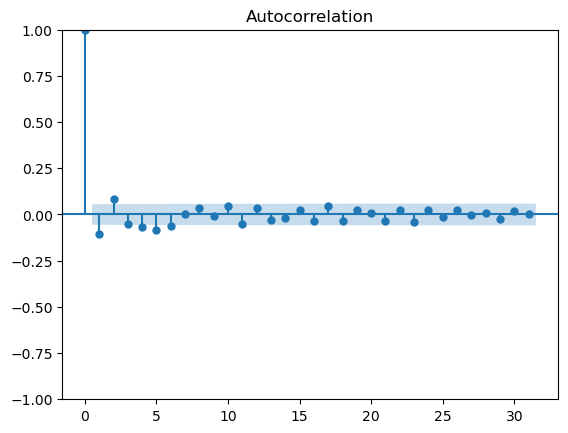

In [52]:
plot_acf(data2);

In [54]:
data2.shape#shape of the data rows and columns

(1241, 1)

In [56]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [58]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1141 entries, 2013-10-10 00:55:00 to 2013-10-13 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1141 non-null   float64
dtypes: float64(1)
memory usage: 17.8 KB


In [60]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [62]:

#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 5, 6, 11]

In [63]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

NameError: name 'ar_model_fit' is not defined

In [ ]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 5, 6, 11]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [ ]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [ ]:
## ARIMA Model

In [ ]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [ ]:
## evaluate the model
print(model_arima_fit.aic)

In [ ]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [ ]:
prediction

In [ ]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [ ]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

In [ ]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

In [ ]:
min(list2)  # lowest aic score

In [ ]:
loc=list2.index(min(list2))
loc

In [ ]:
# pdq corresponding to lowest aic
list1[loc]

In [ ]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [ ]:
print(model_arima_fit.aic) # confirm aic score

In [ ]:
forecast = model_arima_fit.forecast(steps=9)
forecast

In [ ]:
prediction=model_arima_fit.predict(start=1,end=142)

In [ ]:
plt.plot(test)
plt.plot(prediction,color='green')

In [ ]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [ ]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

In [ ]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [ ]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

# Conclusion